In [2]:
import numpy as np
import matplotlib as matlib
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
from scipy.sparse import spdiags
from scipy.sparse import kron
from mpl_toolkits.mplot3d import Axes3D
import time
import random
from sklearn.decomposition import PCA, NMF
import scipy.sparse as sp
import scipy.linalg as linalg
from numpy.random import default_rng
import matplotlib.patches as mpatches
import ot
import Gradient;

In [3]:
##X must have center at [2.25, 2.25]
N = 71; S = 10;
dx = S/N; dy = S/N;
X = [];
for i in range(1, N):
    for j in range(1, N):
        X.append([2.25-S/2 + dx*i, 2.25-S/2 + dy*j]);
X = np.array(X);
k = 2;
w_true = np.array([0.3]);
mu_true = np.array([[1, 3], [3, 2]]);
ytruth = Gradient.model(X, k, mu_true, w_true);

Do experiments in setting two. Where 3 out of 5 parameters are fixed at some values different from the truth. 

In this scenario, we fix $w = 0.2$, $\mu_2 = [4, 3]$ and only let the $\mu_1$ be the variable parameters. Do std, l2, and Wasserstein natural gradient descent starting from initial point [5, 3].

## Experiment of Standard GD
### initial [5, 3]

(36, 2)
(36,)


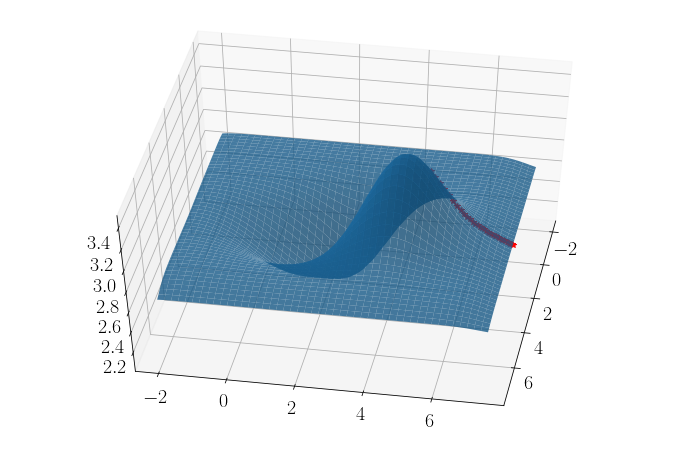

Initial parameter values:
mu1:[5,3] 
Optimized parameter values:
mu1:[7.4, 2.7] 
Time for 35 steps is 0.0723419189453125 seconds.
The average time for each step is 0.0020669119698660714 seconds.


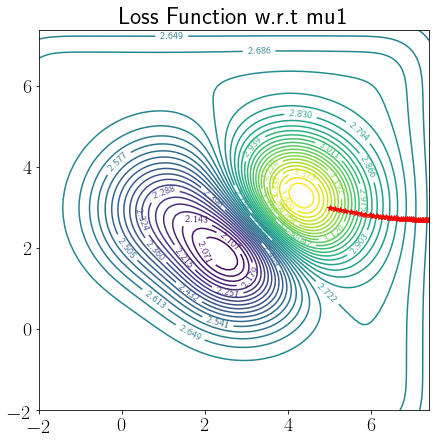

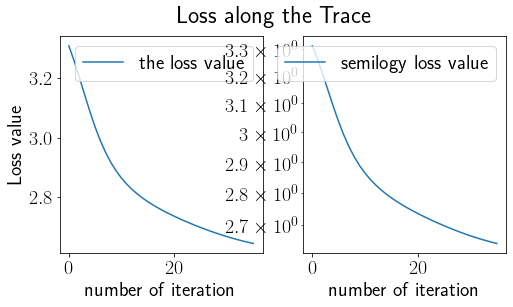

In [12]:
std_trace, _ = Gradient.std_GD_mu1(X, .2, np.array([4, 3]), .3, np.array([5, 3]), 35, 
                    np.array([[-2, 7.5], [-2, 7.5]]), ytruth)

-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


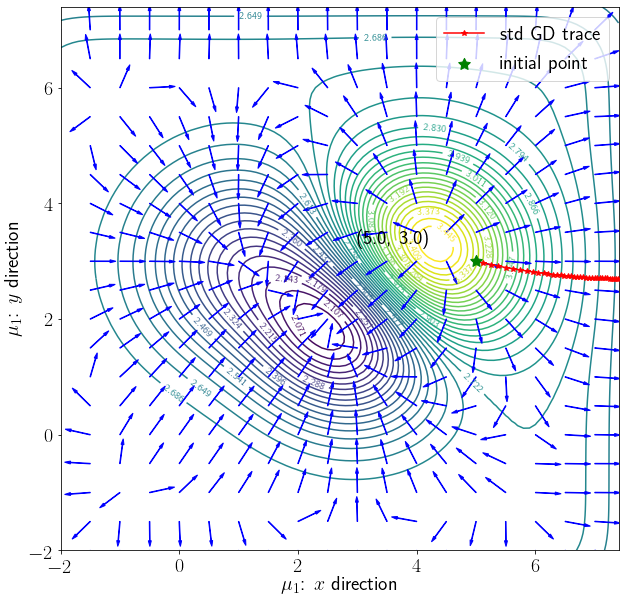

In [14]:
sav = '/Users/leiwanzhou/Desktop/exp/stdmu1-N71-S10-C2d25-fd2-43-lrd3-iter35-cov6VF.eps'
Gradient.Vector_field_stdmu1(X, np.array([4, 3]), .2, ytruth, 
            trace=std_trace, savpath=sav, xrange = [-2, 7.5],
                             yrange = [-2, 7.5]);

## Experiment of L2 natural GD
### initial [5, 3]

(41, 2)
(41,)


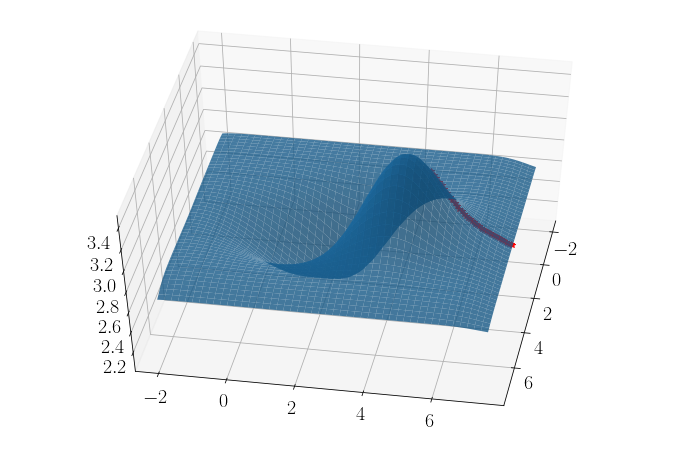

Initial parameter values:
mu1:[5,3] 
Optimized parameter values:
mu1:[7.38, 2.73] 
Time for 40 steps is 0.09496808052062988 seconds.
The average time for each step is 0.002374202013015747 seconds.


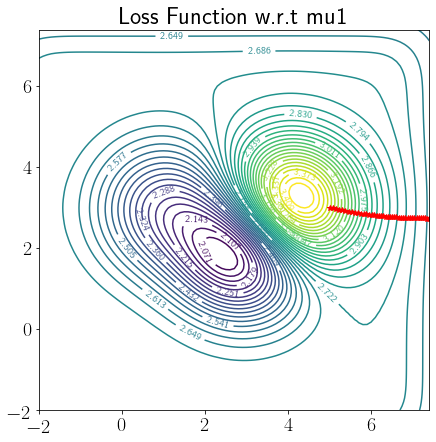

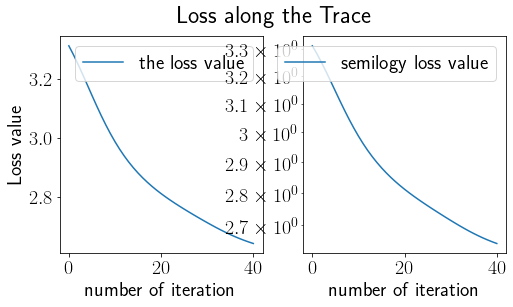

In [22]:
l2_trace, _ = Gradient.l2_Natural_GD_mu1(X, N, .2, np.array([4, 3]), .04, 
     np.array([5, 3]), 40, np.array([[-2, 7.5], [-2, 7.5]]), 
                           ytruth, savepath1='', savepath2='');

/Users/leiwanzhou/Desktop/Optimal_Transport/Gradient_Flow/Wasserstein_Natural_GD/Gradient.py:1229: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (trace != ''):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


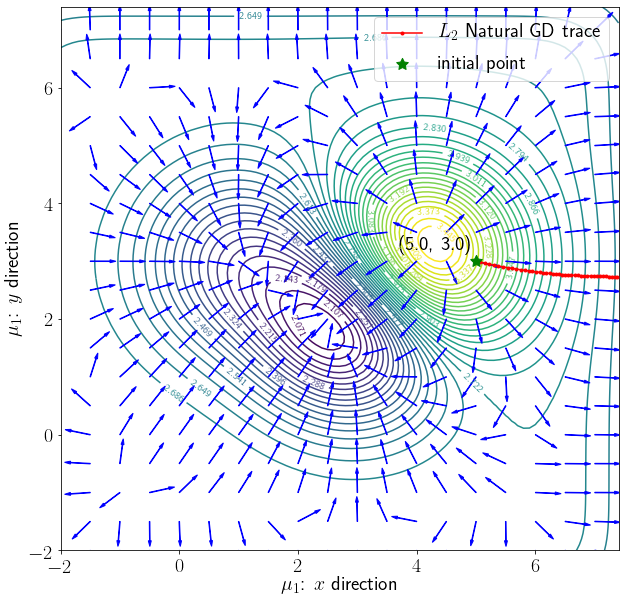

In [25]:
sav = "/Users/leiwanzhou/Desktop/exp/l2mu1-N71-S10-C2d25-fd2-43-lrd04-ini53-iter40-cov6VF.eps"
Gradient.Vector_field_l2mu1(X, np.array([4, 3]), .2, ytruth, N, 
     trace=l2_trace, savpath=sav, xrange = [-2, 7.5], yrange = [-2, 7.5]);

## Experiment of W2 Natural GD
### initial [5, 3]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
(101, 2)
(101,)


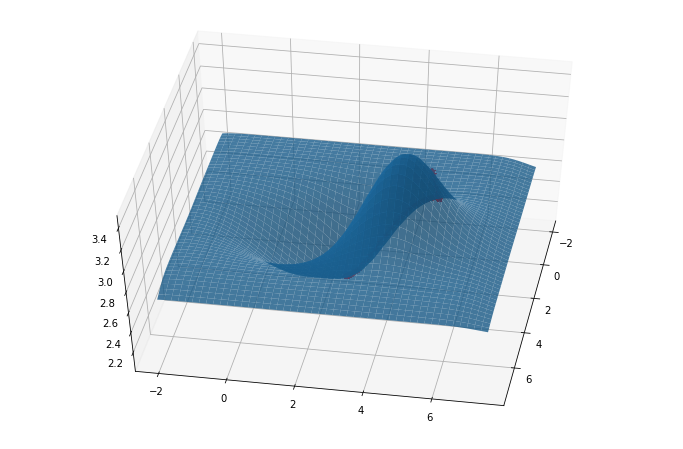

Initial parameter values:
mu1:[5,3] 
Optimized parameter values:
mu1:[2.4, 1.84] 
Time for 100 steps is 1270.554800748825 seconds.
The average time for each step is 12.70554800748825 seconds.


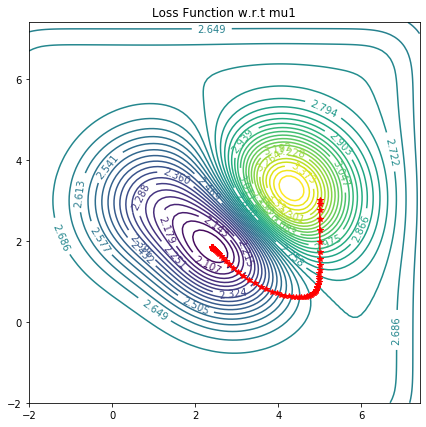

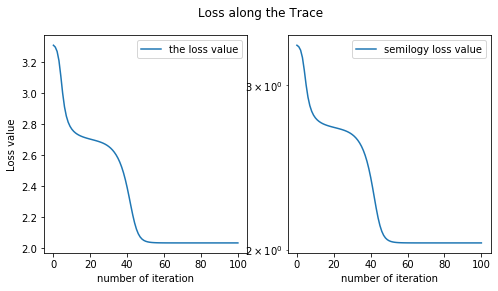

In [8]:
A = Gradient.discretize(N, dx, dy);
prange = np.array([[-2, 7.5], [-2, 7.5]]);
savepath1 = "/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-lr3-100-ini53-N71S10Covd6-cen2d25trace"
savepath2 = "/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-lr3-100-ini53-N71S10Covd6-cen2d25contour"
w2_trace,_ = Gradient.Natural_GD_mu1(X, N, A, 0.2, np.array([4, 3]), 3, np.array([5, 3]), 100, prange, 
                                              ytruth, savepath1, savepath2);


In [12]:
trpath = '/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-lr3-100-ini53-N71S10Covd6-cen2d25trace.csv'
np.savetxt(trpath, w2_trace, delimiter=',');

-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0


/Users/leiwanzhou/Desktop/Optimal_Transport/Gradient_Flow/Wasserstein_Natural_GD/Gradient.py:1144: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (trace != ''):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


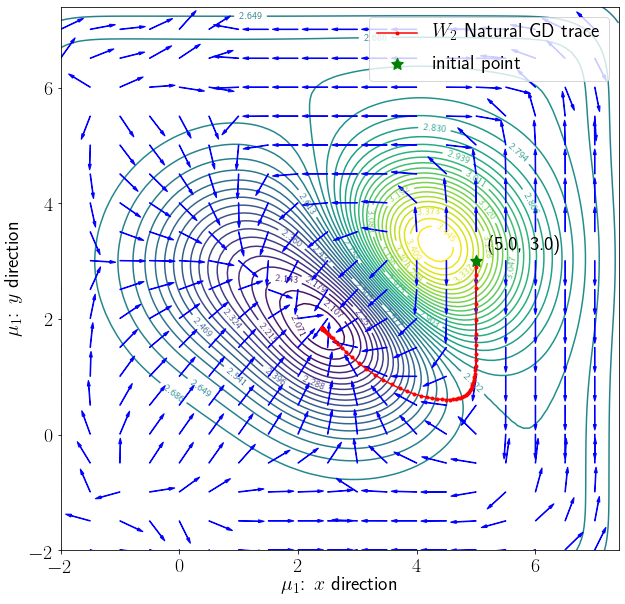

In [14]:
sp = '/Users/leiwanzhou/Desktop/exp/nat-mu1-d2-43-lr3-100-ini53-N71S10Covd6-cen2d25VFtog.eps'
apath = '/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-N71S10Covd6-cen2d25-arrow.csv'
Gradient.Vector_field_w2mu1(X, np.array([4, 3]), .2, ytruth, N, dx, dy, 
        trace=w2_trace, savpath=sp, arrowpath=apath, xrange = [-2, 7.5], 
                   yrange = [-2, 7.5]);


## Experiment of Standard GD
### initial [4.5, 3.5]

(86, 2)
(86,)


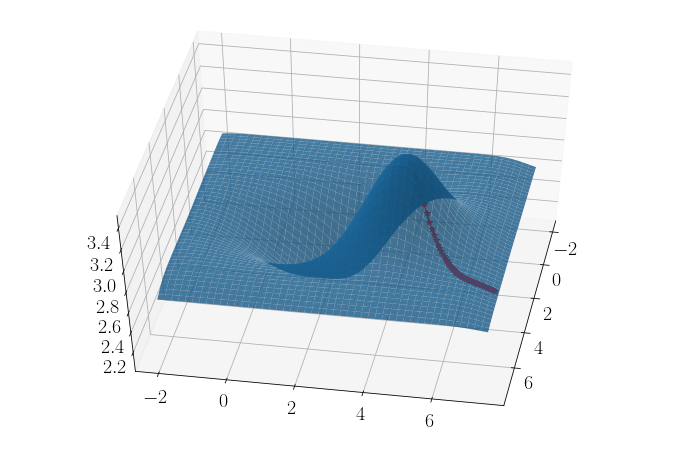

Initial parameter values:
mu1:[4.5,3.5] 
Optimized parameter values:
mu1:[7.28, 5.37] 
Time for 85 steps is 0.1442568302154541 seconds.
The average time for each step is 0.0016971391790053423 seconds.


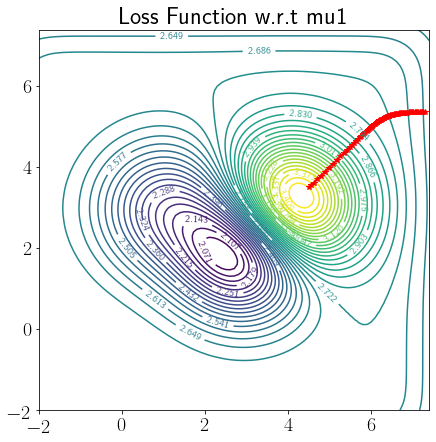

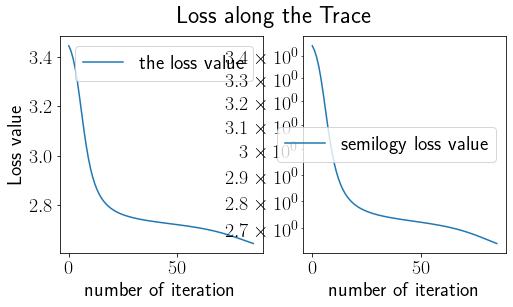

In [10]:
std_trace, _ = Gradient.std_GD_mu1(X, .2, np.array([4, 3]), .3, np.array([4.5, 3.5]), 85, 
                    np.array([[-2, 7.5], [-2, 7.5]]), ytruth)

-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0


/Users/leiwanzhou/Desktop/Optimal_Transport/Gradient_Flow/Wasserstein_Natural_GD/Gradient.py:784: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (trace != ''):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


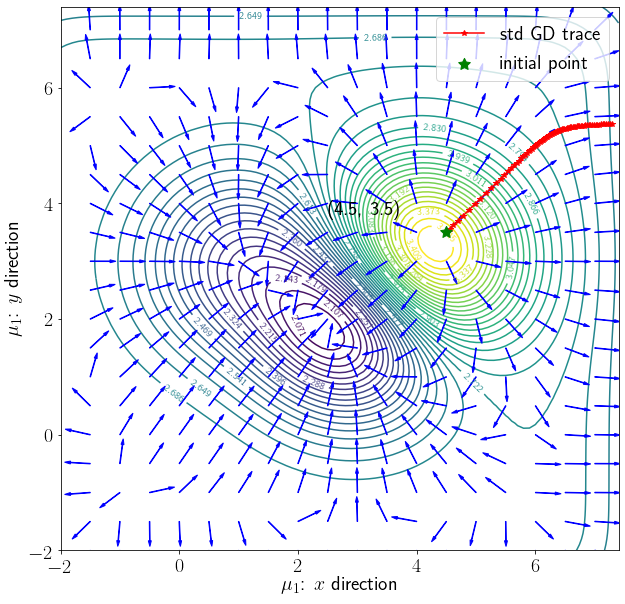

In [11]:
sav = '/Users/leiwanzhou/Desktop/exp/stdmu1-N71-S10-C2d25-fd2-43-lrd3-iter85-ini4d53d5-cov6VF.eps'
Gradient.Vector_field_stdmu1(X, np.array([4, 3]), .2, ytruth, 
            trace=std_trace, savpath=sav, xrange = [-2, 7.5],
                             yrange = [-2, 7.5]);


## Experiment of L2 Natural GD
### initial [4.5, 3.5]


(86, 2)
(86,)


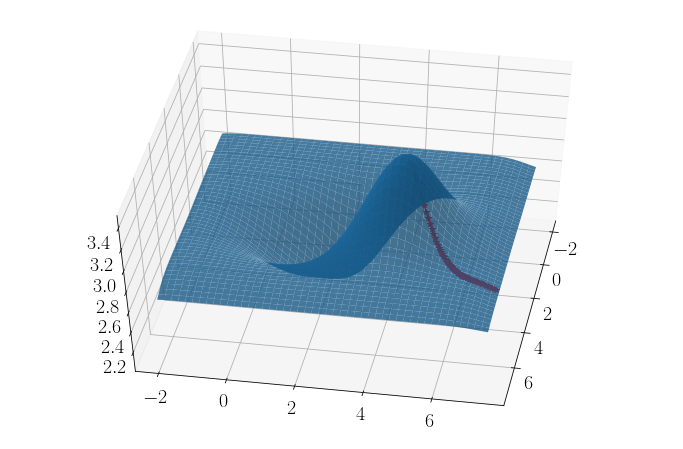

Initial parameter values:
mu1:[4.5,3.5] 
Optimized parameter values:
mu1:[7.29, 5.29] 
Time for 85 steps is 0.16220307350158691 seconds.
The average time for each step is 0.001908271452959846 seconds.


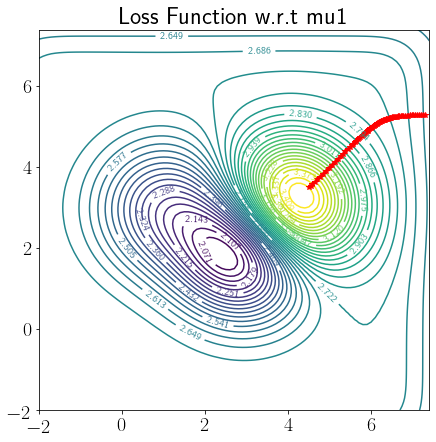

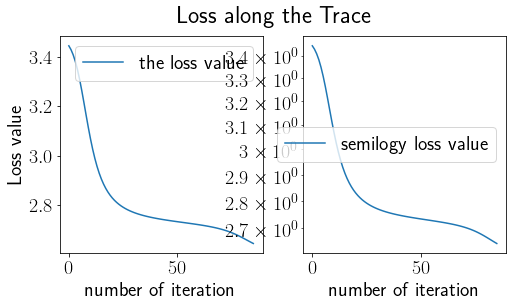

In [14]:
l2_trace, _ = Gradient.l2_Natural_GD_mu1(X, N, .2, np.array([4, 3]), .05, 
     np.array([4.5, 3.5]), 85, np.array([[-2, 7.5], [-2, 7.5]]), 
                           ytruth, savepath1='', savepath2='');

/Users/leiwanzhou/Desktop/Optimal_Transport/Gradient_Flow/Wasserstein_Natural_GD/Gradient.py:1229: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (trace != ''):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


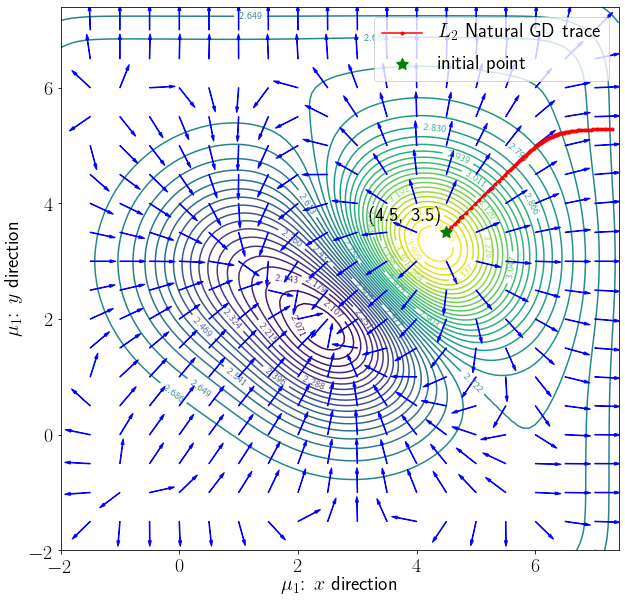

In [15]:
sav = "/Users/leiwanzhou/Desktop/exp/l2mu1-N71-S10-C2d25-fd2-43-lrd05-ini53-iter85-ini4d53d5-cov6VF.eps"
Gradient.Vector_field_l2mu1(X, np.array([4, 3]), .2, ytruth, N, 
     trace=l2_trace, savpath=sav, xrange = [-2, 7.5], yrange = [-2, 7.5]);

## Experiment of W2 Natural GD
### initial [4.5, 3.5]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
(201, 2)
(201,)


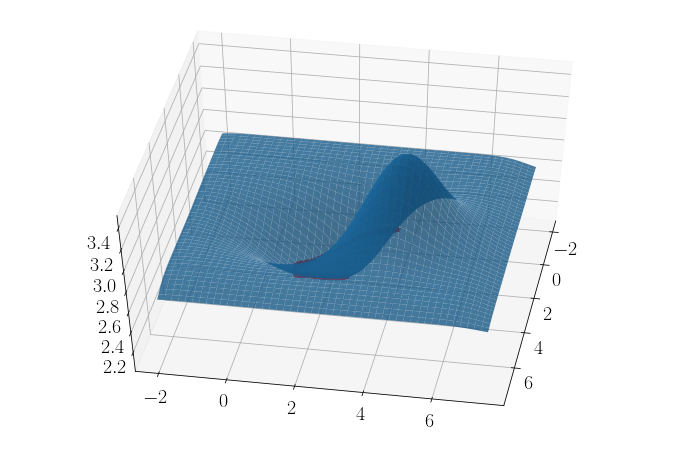

Initial parameter values:
mu1:[4.5,3.5] 
Optimized parameter values:
mu1:[2.4, 1.84] 
Time for 200 steps is 2720.7350347042084 seconds.
The average time for each step is 13.603675173521042 seconds.


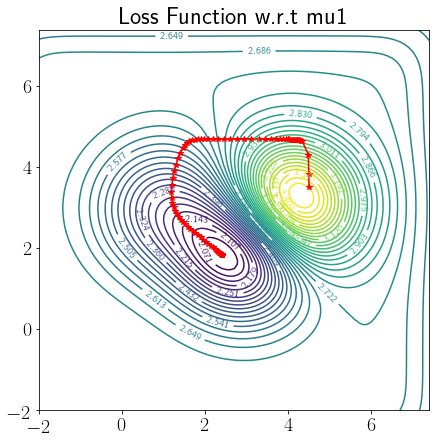

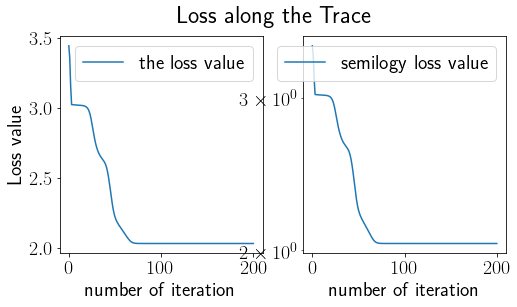

In [38]:
A = Gradient.discretize(N, dx, dy);
prange = np.array([[-2, 7.5], [-2, 7.5]]);
savepath1 = "/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-lr5-200-ini4d53d5-N71S10Covd6-cen2d25trace"
savepath2 = "/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-lr5-200-ini4d53d5-N71S10Covd6-cen2d25contour"
w2_trace,_ = Gradient.Natural_GD_mu1(X, N, A, 0.2, np.array([4, 3]), 5, np.array([4.5, 3.5]), 200, prange, 
                                              ytruth, savepath1, savepath2);


In [39]:
txtpath = "/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-lr5-200-ini4d53d5-N71S10Covd6-cen2d25trace.csv";
np.savetxt(txtpath, w2_trace, delimiter=',');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


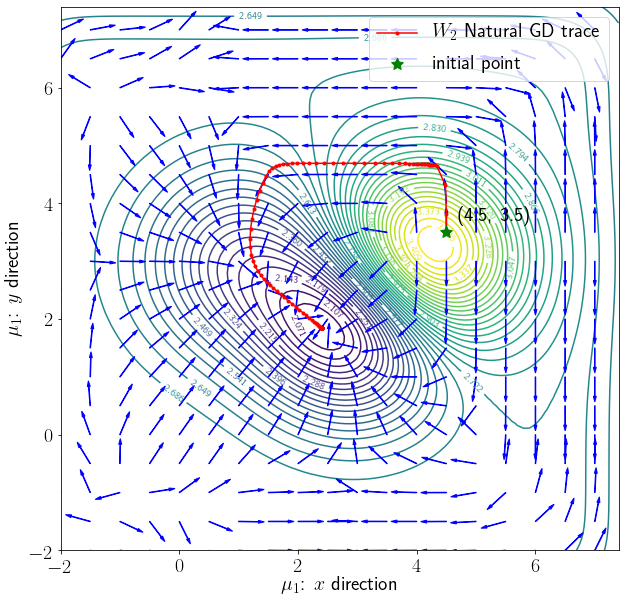

In [4]:
txtpath = "/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-lr5-200-ini4d53d5-N71S10Covd6-cen2d25trace.csv";
apath = '/Users/leiwanzhou/Desktop/exp/traces/nat-mu1-d2-43-N71S10Covd6-cen2d25-arrow.csv'
sp = "/Users/leiwanzhou/Desktop/exp/nat-mu1-d2-43-lr5-200-ini4d53d5-N71S10Covd6-cen2d25.eps"
Gradient.plot_VF_mu1(X, np.array([4, 3]), .2, ytruth, m=19, n=19, 
            vfpath=apath, tracepath=txtpath, xrange=[-2, 7.5], 
            yrange=[-2, 7.5], savpath=sp);

